In [3]:
from openseespy.opensees import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unidades import *
from parametros import *
import itertools
import opsvis as opsv

In [4]:
class material:
  def __init__(self, tipo:str='Elastic', tag:int=1, caracteristicas:float=[E]):
     self.tipo=tipo
     self.tag=tag
     self.caracteristicas=caracteristicas
def MediaCoordenada(arreglo:float=[]):
   x=0
   y=0
   z=0
   total=len(arreglo)
   for item in range(total):
      Nudo=arreglo[item]
      x=x+Nudo[0]
      y=y+Nudo[1]
      z=z+Nudo[2]
   return [x/total,y/total,z/total]

def EyGdeFc(fc:float=210):
   Edfc=15100*210**0.5*kgf/cm**2
   Gdfc=0.5*Edfc/(1+0.2)
   return [Edfc,Gdfc]

In [5]:
#Definición de materiales con una clase personalizada
#https://opensees.berkeley.edu/wiki/index.php/UniaxialMaterial_Command
#https://openseespydoc.readthedocs.io/en/latest/src/uniaxialMaterial.html
EyG210=EyGdeFc(210)
Concreto210=material('Elastic',1,[EyG210[0]])

Text(0.5, 0, 'z')

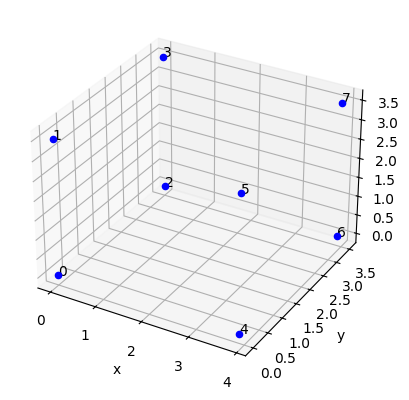

In [6]:
##Malla Global
####Definición de Malla
Span_X=3.9
Span_Y=3.5
Storey_Z=3.5

Grillas_X=2
Grillas_Y=2
Grillas_Z=2

####Generación de Malla
Absolutas_x=[]
Absolutas_y=[]
Absolutas_z=[]
Nodos=[]

for item in range(Grillas_X):
  Absolutas_x.append(0+item*Span_X)
for item in range(Grillas_Y):
  Absolutas_y.append(0+item*Span_Y)
for item in range(Grillas_Z):
  Absolutas_z.append(0+item*Storey_Z)

for x,y,z in itertools.product(Absolutas_x,Absolutas_y,Absolutas_z):
  Nodos.append([x,y,z])

#####Imprimimos la malla
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for item in range(len(Nodos)):
  Nodo=Nodos[item]
  x=Nodo[0]
  y=Nodo[1]
  z=Nodo[2]


  ax.scatter(x,y,z,color='b')
  ax.text(x,y,z,  '%s' % (item), size=10, zorder=1,color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.view_init(30,30,0)
#ax.view_init(30,30,0)


Text(0.5, 0, 'z')

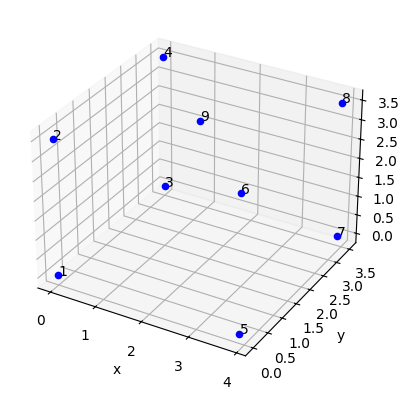

In [7]:
####Puntos adicionales en caso de ser necesario
  
Nodos.append(MediaCoordenada([Nodos[1],Nodos[3],Nodos[5],Nodos[7]]))
#####Imprimimos la malla
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for item in range(len(Nodos)):
  Nodo=Nodos[item]
  x=Nodo[0]
  y=Nodo[1]
  z=Nodo[2]


  ax.scatter(x,y,z,color='b')
  ax.text(x,y,z,  '%s' % (item+1), size=10, zorder=1,color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.view_init(30,30,0)
#ax.view_init(30,30,0)

In [18]:
#Empotramientos y diafragmas
PuntosFijos=[1,3,5,7]
DiafragmaRigido=[[9,[2,4,6,8]]]

#Variaciones de peralte $Base, $PeralteInicial, $PeralteFinal, $Muestreos
DcInicial=0.25
DcFinal=0.25
Saltosc=1
CaractColumnasTipo1=[0.25,DcInicial,DcFinal,Saltosc]
CaractColumnasTipo2=[0.25,DcInicial,DcFinal,Saltosc]
CaractColumnasTipo3=[0.25,DcInicial,DcFinal,Saltosc]
CaractColumnasTipo4=[0.25,DcInicial,DcFinal,Saltosc]
DvInicial=0.20
DvFinal=0.20
Saltosv=1
CaractVigasTipo1=[0.25,DvInicial,DvFinal,Saltosv]
CaractVigasTipo2=[0.25,DvInicial,DvFinal,Saltosv]
CaractVigasTipo3=[0.25,DvInicial,DvFinal,Saltosv]
CaractVigasTipo4=[0.25,DvInicial,DvFinal,Saltosv]

#Elementos lineales
ColumnasTipo1=[[[1,2],CaractColumnasTipo1,EyG210]]
ColumnasTipo2=[[[3,4],CaractColumnasTipo2,EyG210]]
ColumnasTipo3=[[[7,8],CaractColumnasTipo3,EyG210]]
ColumnasTipo4=[[[5,6],CaractColumnasTipo4,EyG210]]
VigasTipo1=[[[2,4],CaractVigasTipo1,EyG210]]
VigasTipo2=[[[4,8],CaractVigasTipo2,EyG210]]
VigasTipo3=[[[6,8],CaractVigasTipo3,EyG210]]
VigasTipo4=[[[2,6],CaractVigasTipo4,EyG210]]

#Elementos shell
LosaTipo1=[[2,4,8,6]]

NumeroDeIteracionesParaMalla=CaractColumnasTipo1[3]*CaractColumnasTipo2[3]*CaractColumnasTipo3[3]*CaractColumnasTipo4[3]*CaractVigasTipo1[3]*CaractVigasTipo2[3]*CaractVigasTipo3[3]*CaractVigasTipo4[3]
print(NumeroDeIteracionesParaMalla)


1


In [9]:
#Factores de amplificación y reducción sísmica
def switchZ(Ztype):
    if Ztype == 1:
        return 0.1
    elif Ztype == 2:
        return 0.25
    elif Ztype == 3:
        return 0.35
    elif Ztype == 4:
        return 0.45
def switchS(Stype,Ztype):
    if Stype == 1:
        Svalue=[0.80,0.80,0.80,0.80]
        Tp,Tl=0.3,3.0
        return Svalue[Ztype-1],Tp,Tl
    elif Stype == 2:
        Svalue=[1,1,1,1]
        Tp,Tl=0.4,2.5
        return Svalue[Ztype-1],Tp,Tl
    elif Stype == 3:
        Svalue=[1.60,1.20,1.15,1.05]
        Tp,Tl=0.6,2.0
        return Svalue[Ztype-1],Tp,Tl
    elif Stype == 4:
        Svalue=[0.80,0.80,0.80,0.80]
        Tp,Tl=1.0,1.6
        return Svalue[Ztype-1],Tp,Tl
def switchU(Utype):
    if Utype == "A":
        return 1.5
    elif Utype == "B":
        return 1.3
    elif Utype == "C":
        return 1.0
    
def switchR(Rtype):
    if Rtype == "Pórticos":
        return 8
    elif Rtype == "Dual":
        return 7
    elif Rtype == "Muros Estructurales":
        return 6
    elif Rtype == "MDL": #Muros de ductilidad limitada
        return 4
    elif Rtype == "Albañilería": #Muros de ductilidad limitada
        return 3    
#Factores estáticos
Zfactor=switchZ(4)
Sfactor,Tp,tl=switchS(3,4)
Ufactor=switchU("C")
Rxfactor=switchR("Pórticos")
Ryfactor=switchR("Pórticos")

print(Zfactor,Sfactor,Ufactor,Tp,tl,Rxfactor,Ryfactor)

0.45 1.05 1.0 0.6 2.0 8 8


In [10]:
#Análisis estático
def switchCt(Cttype):
    if Cttype == 1:
        return 35
    elif Cttype == 2:
        return 45
    elif Cttype == 3:
        return 60
#direccionX    
Ctxfactor=switchCt(1)
Txfactor=max(Absolutas_z)/Ctxfactor

Cxfactor=Tp/Txfactor
if (Cxfactor/Rxfactor)<0.11:
    Cxfactor=0.11*Rxfactor


#direccionY
Ctyfactor=switchCt(1)
Tyfactor=max(Absolutas_z)/Ctyfactor

Cyfactor=Tp/Tyfactor
if (Cyfactor/Ryfactor)<0.11:
    Cyfactor=0.11*Ryfactor


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


WARNING BandGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 0


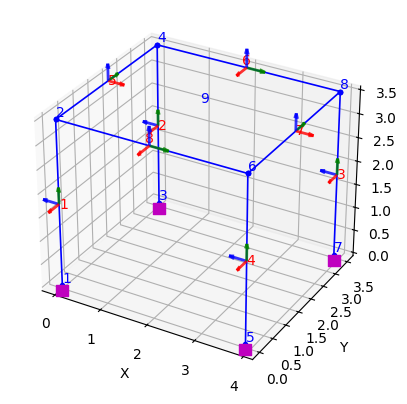

In [38]:
bc1=CaractColumnasTipo1[0]
bc2=CaractColumnasTipo2[0]
bc3=CaractColumnasTipo3[0]
bc4=CaractColumnasTipo4[0]

bv1=CaractVigasTipo1[0]
bv2=CaractVigasTipo2[0]
bv3=CaractVigasTipo3[0]
bv4=CaractVigasTipo4[0]

PeraltesColumnas1=np.linspace(CaractColumnasTipo1[1],CaractColumnasTipo1[2],CaractColumnasTipo1[3])
PeraltesColumnas2=np.linspace(CaractColumnasTipo2[1],CaractColumnasTipo2[2],CaractColumnasTipo2[3])
PeraltesColumnas3=np.linspace(CaractColumnasTipo3[1],CaractColumnasTipo3[2],CaractColumnasTipo3[3])
PeraltesColumnas4=np.linspace(CaractColumnasTipo4[1],CaractColumnasTipo4[2],CaractColumnasTipo4[3])
PeraltesVigas1=np.linspace(CaractVigasTipo1[1],CaractVigasTipo1[2],CaractVigasTipo1[3])
PeraltesVigas2=np.linspace(CaractVigasTipo2[1],CaractVigasTipo2[2],CaractVigasTipo2[3])
PeraltesVigas3=np.linspace(CaractVigasTipo3[1],CaractVigasTipo3[2],CaractVigasTipo3[3])
PeraltesVigas4=np.linspace(CaractVigasTipo4[1],CaractVigasTipo4[2],CaractVigasTipo4[3])


for pc1,pc2,pc3,pc4,pv1,pv2,pv3,pv4 in itertools.product(PeraltesColumnas1,PeraltesColumnas2,PeraltesColumnas3,PeraltesColumnas4,PeraltesVigas1,PeraltesVigas2,PeraltesVigas3,PeraltesVigas4):
    
    wipe()
    model('basic', '-ndm', 3, '-ndf', 6)
    #Nudos
    
    for item in range(len(Nodos)):
        node(item+1,*Nodos[item])

    #Empotramiento
    for item in range(len(PuntosFijos)):
        fix(int(PuntosFijos[item]),*[1,1,1,1,1,1])    
    #DiafragmaRigido Desplazamiento restringido:-> $1=x $2=y $3:z
    #for item in range(len(DiafragmaRigido)):
    #    TuplaRigida=DiafragmaRigido[0]
    #    Centroide=TuplaRigida[0]
    #    PuntosSecundarios=TuplaRigida[1]
    #    fix(int(Centroide),*[0,1,0,1,0,1])
    #    rigidDiaphragm(2,int(Centroide),*[int(PuntosSecundarios[0]),int(PuntosSecundarios[1]),int(PuntosSecundarios[2]),int(PuntosSecundarios[3])])
    
    #Transformaciones Lineales
    geomTransf('Linear',int(1),*[0,-1,0])#columnas
    geomTransf('Linear',int(2),*[0,-1,0])#vigas1
    geomTransf('Linear',int(3),*[1,0,0])#vigas2

    #prop_col
    #0 ,1   ,2   ,3   ,4 ,5
    #Ac, ρlc, Izc, Iyc, k, Jc
    IdElemento=1
    for item in ColumnasTipo1:
        Caract_item=item[1]
        PropCol=prop_col(Caract_item[0],pc1)
        Extremos=item[0]
        Material_item=item[2]
        NodoI=Extremos[0]
        NodoJ=Extremos[1]
        A=PropCol[0]
        E=Material_item[0]
        G=Material_item[1]
        J=PropCol[5]
        Iy=PropCol[3]
        Iz=PropCol[2]
        element('elasticBeamColumn',int(IdElemento),*Extremos,A,E,G,J,Iy,Iz,int(1))
        IdElemento=IdElemento+1
    
    for item in ColumnasTipo2:
        Caract_item=item[1]
        PropCol=prop_col(Caract_item[0],pc2)
        Extremos=item[0]
        Material_item=item[2]
        NodoI=Extremos[0]
        NodoJ=Extremos[1]
        A=PropCol[0]
        E=Material_item[0]
        G=Material_item[1]
        J=PropCol[5]
        Iy=PropCol[3]
        Iz=PropCol[2]
        element('elasticBeamColumn',int(IdElemento),*Extremos,A,E,G,J,Iy,Iz,int(1))
        IdElemento=IdElemento+1
    
    for item in ColumnasTipo3:
        PropCol=prop_col(Caract_item[0],pc3)
        Caract_item=item[1]
        Extremos=item[0]
        Material_item=item[2]
        NodoI=Extremos[0]
        NodoJ=Extremos[1]
        A=PropCol[0]
        E=Material_item[0]
        G=Material_item[1]
        J=PropCol[5]
        Iy=PropCol[3]
        Iz=PropCol[2]
        element('elasticBeamColumn',int(IdElemento),*Extremos,A,E,G,J,Iy,Iz,int(1))
        IdElemento=IdElemento+1
    
    for item in ColumnasTipo4:
        Caract_item=item[1]
        PropCol=prop_col(Caract_item[0],pc4)
        Extremos=item[0]
        Material_item=item[2]
        NodoI=Extremos[0]
        NodoJ=Extremos[1]
        A=PropCol[0]
        E=Material_item[0]
        G=Material_item[1]
        J=PropCol[5]
        Iy=PropCol[3]
        Iz=PropCol[2]
        element('elasticBeamColumn',int(IdElemento),*Extremos,A,E,G,J,Iy,Iz,int(1))
        IdElemento=IdElemento+1

    for item in VigasTipo1:
        Caract_item=item[1]
        PropCol=prop_vig(Caract_item[0],pv1)
        Extremos=item[0]
        Material_item=item[2]
        NodoI=Extremos[0]
        NodoJ=Extremos[1]
        A=PropCol[0]
        E=Material_item[0]
        G=Material_item[1]
        J=PropCol[5]
        Iy=PropCol[3]
        Iz=PropCol[2]
        element('elasticBeamColumn',int(IdElemento),*Extremos,A,E,G,J,Iy,Iz,int(3))
        IdElemento=IdElemento+1
    for item in VigasTipo2:
        Caract_item=item[1]
        PropCol=prop_vig(Caract_item[0],pv2)
        Extremos=item[0]
        Material_item=item[2]
        NodoI=Extremos[0]
        NodoJ=Extremos[1]
        A=PropCol[0]
        E=Material_item[0]
        G=Material_item[1]
        J=PropCol[5]
        Iy=PropCol[3]
        Iz=PropCol[2]
        element('elasticBeamColumn',int(IdElemento),*Extremos,A,E,G,J,Iy,Iz,int(2))
        IdElemento=IdElemento+1
    for item in VigasTipo3:
        Caract_item=item[1]
        PropCol=prop_vig(Caract_item[0],pv3)
        Extremos=item[0]
        Material_item=item[2]
        NodoI=Extremos[0]
        NodoJ=Extremos[1]
        A=PropCol[0]
        E=Material_item[0]
        G=Material_item[1]
        J=PropCol[5]
        Iy=PropCol[3]
        Iz=PropCol[2]
        element('elasticBeamColumn',int(IdElemento),*Extremos,A,E,G,J,Iy,Iz,int(3))
        IdElemento=IdElemento+1
    for item in VigasTipo4:
        Caract_item=item[1]
        PropCol=prop_vig(Caract_item[0],pv4)
        Extremos=item[0]
        Material_item=item[2]
        NodoI=Extremos[0]
        NodoJ=Extremos[1]
        A=PropCol[0]
        E=Material_item[0]
        G=Material_item[1]
        J=PropCol[5]
        Iy=PropCol[3]
        Iz=PropCol[2]
        element('elasticBeamColumn',int(IdElemento),*Extremos,A,E,G,J,Iy,Iz,int(2))
        IdElemento=IdElemento+1
    opsv.plot_model('nodes','elements')
        
    #time series
    ts_tag=1
    timeSeries('Constant', ts_tag,'-factor',1.0)
    #load pattern
    patternTag=1
    pattern('Plain', patternTag,ts_tag,'-fact',1.0)
    #cargas
    fx=0
    fy=10e10*kgf
    fz=0
    load(2,fx,fy,fz, 0., 0., 0.)
    # ------------------------------
    # Start of analysis generation
    # ------------------------------

    # create SOE
    system("BandGeneral")

    # create DOF number
    numberer("RCM")

    # create constraint handler
    constraints("Transformation")

    test('NormDispIncr', 1.0e-6, 6, 2)
    # create integrator
    integrator("LoadControl", 1.0)

    # create algorithm
    algorithm("Linear")

    # create analysis object
    analysis("Static")

    # perform the analysis
    analyze(1)
    d1 = nodeDisp(9)
    print(d1)

